In [50]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
from PIL import Image
import time

In [67]:
img = Image.open('C:/Users/lenovo/Desktop/yapayZeka/5.jpg').convert('RGB')
pix_val = list(img.getdata())

In [68]:
dizi = list()
for r,g,b in pix_val:
    if r == 0:
        r = 1
    else:
        r = 255 - r  
    dizi.append(r)
grid = np.zeros((1000, 1000))
count = 0
while(count<1000000):
    for i in range(0,1000):
        for j in range(0,1000):
            grid[i][j] = dizi[count]
            count += 1 


Number of elements : 976



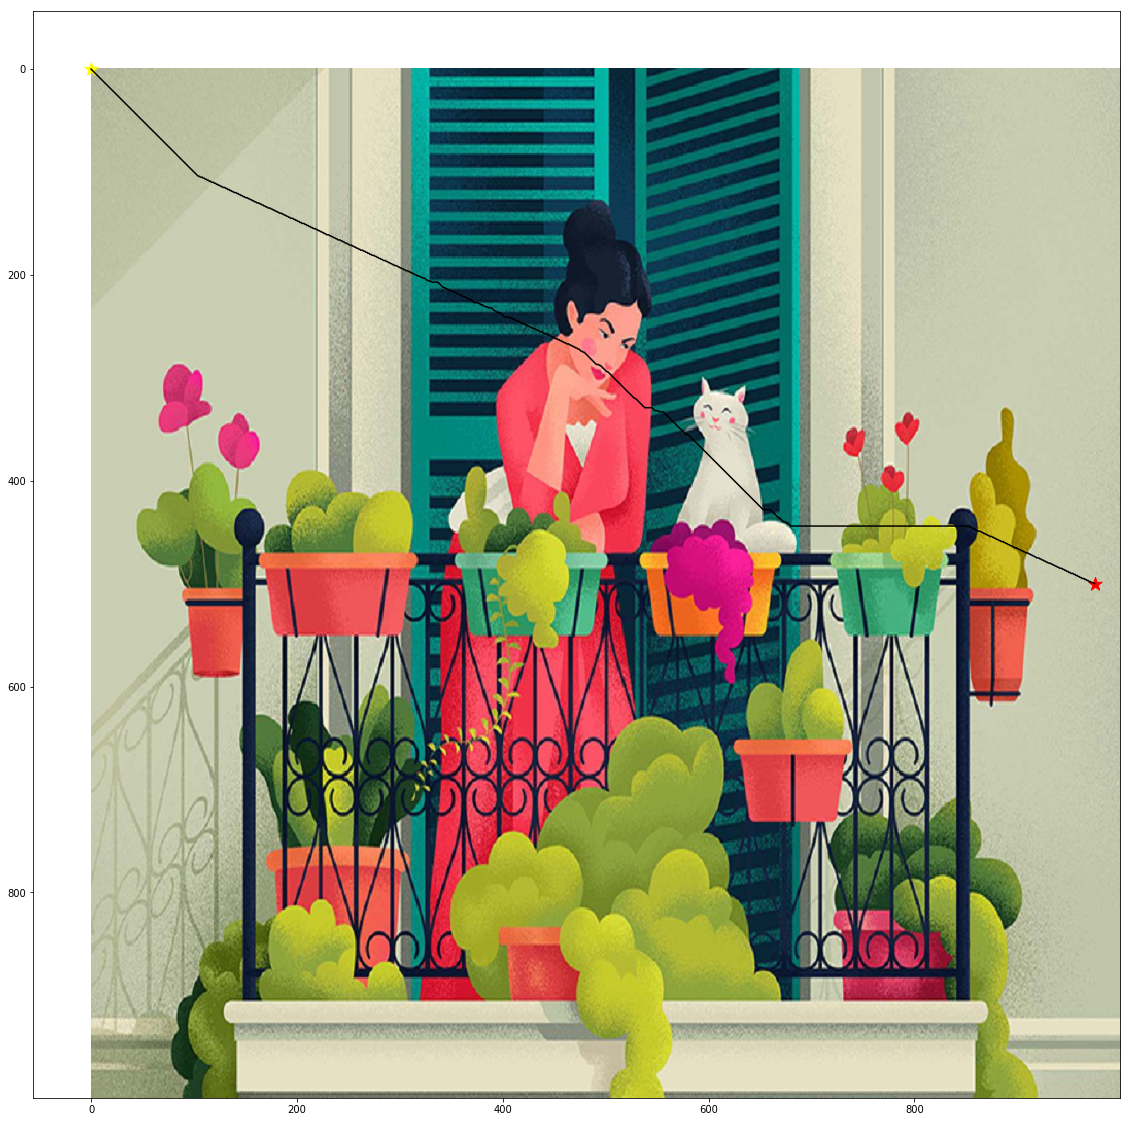

Searching-Time :  184.3630452156067


In [69]:
baslangıc_zaman=time.time()
# start point and goal
start = (0,0)
goal = (500,975)

# heuristic function for path scoring
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

# path finding function
def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
    return False

route = astar(grid, start, goal)
route = route + [start]
route = route[::-1]

print("Number of elements :" , len(route) )
print()
#print("Path : ", route)

# plot the path
x_coords = []
y_coords = []
for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)
    
# plot map and path
fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(img, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 200)
ax.plot(y_coords,x_coords, color = "black")
plt.show()

bitis_zaman=time.time()
print("Searching-Time : ",  bitis_zaman-baslangıc_zaman)